In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
df=pd.read_csv("Mall_Customers.csv")

In [48]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
x=df.iloc[:,[3,4]].values

In [51]:
from sklearn.cluster import KMeans

In [52]:
wcss=[]
for i in range(1,11):
    k=KMeans(n_clusters = i, init='k-means++', random_state=45)
    k.fit(x)
    
    wcss.append(k.inertia_)


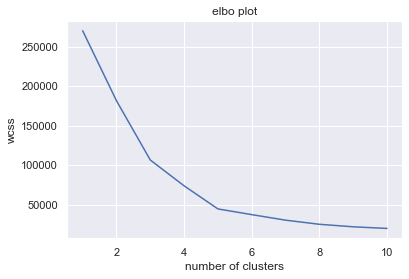

In [53]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbo plot')
plt.ylabel("wcss")
plt.xlabel('number of clusters')
plt.show()

In [54]:
k=KMeans(n_clusters=5,init='k-means++',random_state = 45)
#return a lebel for each data point on the basis of their cluster
y = k.fit_predict(x)
print(y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


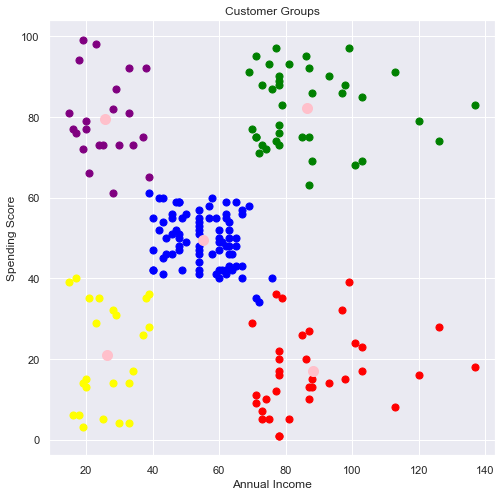

In [58]:
plt.figure(figsize=(8,8))

plt.scatter(x[y==0,0], x[y==0,1], s=50, c='blue', label='cluster1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='yellow', label='cluster2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='green', label='cluster3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='red', label='cluster4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='purple', label='cluster5')

plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1],s=100,c='pink')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


